In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Checking for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
X = df[['EstimatedSalary']]

In [8]:
inertia = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

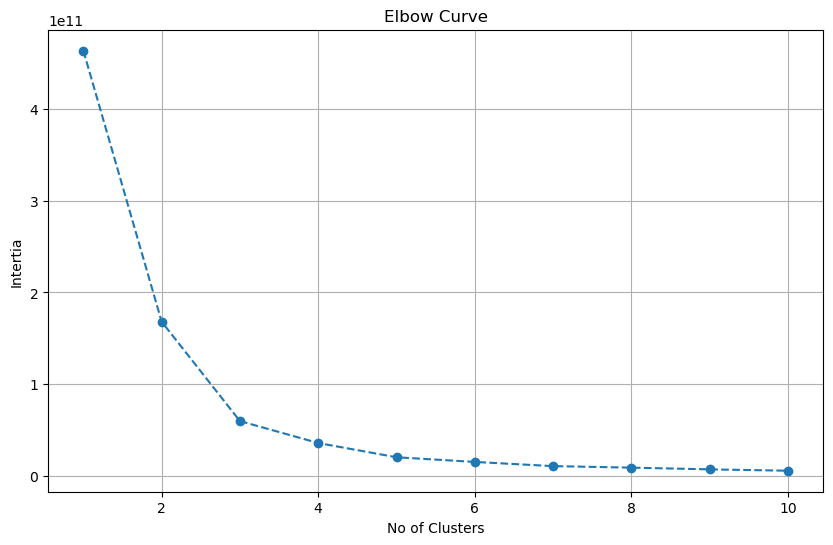

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10,6))
plt.plot(k_range,inertia,marker='o',linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')
plt.grid(True)
plt.show()
plt.savefig("elbow_curve_3.png")

In [10]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k,random_state=0)
df['clusters'] = kmeans.fit_predict(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
centers = kmeans.cluster_centers_
sorted_centers = np.sort(centers,axis=0)
sorted_centers

array([[ 29981.48148148],
       [ 60327.73109244],
       [ 86000.        ],
       [130862.06896552]])

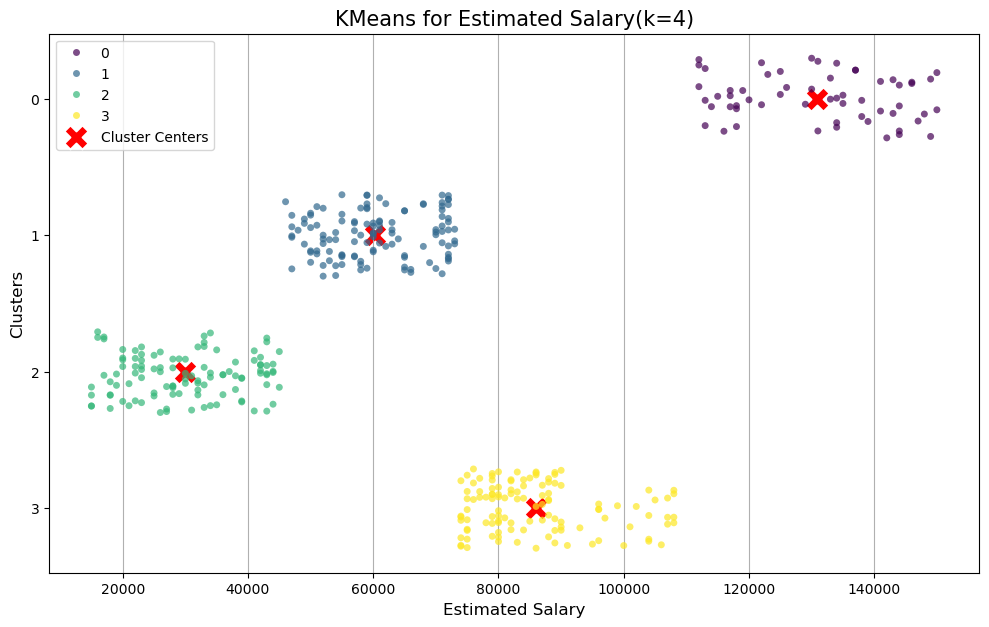

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(12,7))
sns.stripplot(x='EstimatedSalary',y='clusters',data=df,palette='viridis',hue='clusters',jitter=0.3,alpha=0.7,orient='h')

centers_df = pd.DataFrame({'cluster':range(optimal_k),'center':centers.flatten()})
sns.scatterplot(x='center',y='cluster',data=centers_df,marker="X",s=300,color='red',label="Cluster Centers")
plt.title("KMeans for Estimated Salary(k=4)",fontsize=15)
plt.xlabel("Estimated Salary",fontsize=12)
plt.ylabel("Clusters",fontsize=12)
plt.yticks(ticks=range(optimal_k))
plt.legend()
plt.grid(axis='x')
plt.show()
plt.savefig("kmeans_cluster_plot_3.png")

In [22]:
print(df['clusters'].value_counts().sort_index())

clusters
0     58
1    119
2    108
3    115
Name: count, dtype: int64
